In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
BASE_DIR = 'C:\\Users\\shrey\\Titanic-Dataset\\Titanic-Dataset.csv'
print(BASE_DIR)
df= pd.read_csv(BASE_DIR)

C:\Users\shrey\Titanic-Dataset\Titanic-Dataset.csv


In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# About this file
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Objective:
Understand the Dataset & cleanup (if required).
Build a strong classification model to predict whether the passenger survives or not.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

# Variables

    PassengerId - Passenger ID
    Survived - Weather Survived or not: 0 = No, 1 = Yes
    Pclass - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
    Name - Name of the Passenger
    Sex - Gender
    Age- Age in years
    SibSp - No. of siblings / spouses aboard the Titanic
    Parch - No. of parents / children aboard the Titanic
    Ticket - Ticket number
    Fare- Passenger fare
    Cabin - Cabin number
    Embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton



In [14]:
df.shape

(891, 12)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891 data points are present which means that there are 891 passengers on the ship Titanic

# Classification of variables
    PassengerId - Discrete data
    Survived - Categorical Data (Nominal Data)
    Pclass - Categorical Data (Ordinal data)
    Name - 
    Sex - Qualitative Data (Nominal data)
    Age - Discrete Data
    SibSp - Discrete Data
    Parch - Discrete Data
    Ticket -
    Fare - Continous Data
    Cabin - 
    Embarked - Categorical Data (Nominal Data)



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

Cabin id data is not null for only 204 data points and age is not null for 714 data points
Embarked is non null for 889data points

In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

out of 891 people, only 342 people have survived and 549 died

In [36]:
# missing data 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

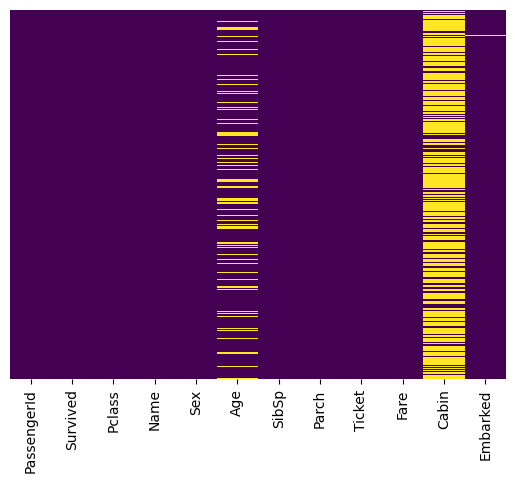

In [25]:
# Heat Map of missing data

import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Most of the missing data comes from the cabin feature, this could be because not everyone had a cabin

In [45]:
print(df.duplicated().sum())
print (df['Cabin'].duplicated().sum())
print (df['Name'].duplicated().sum())


0
743
0


In [28]:
# Filling Data in Embarked Field
print('Embarkation per ports \n{}'.format(df['Embarked'].value_counts()))

# since the most common port is Southampton the chances are that the missing one is from there
df['Embarked'].fillna(value='S', inplace=True)

print('Embarkation per ports after filling \n{}'.format(df['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


To fill the age, we can check the titles (Miss, Mr, Mrs, Master, Dr) and take the age average of each one, then fill the age according to the title. Yes, Master is one of the titles used in Titanic, is used for boys and young men, mostly by english people.



Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


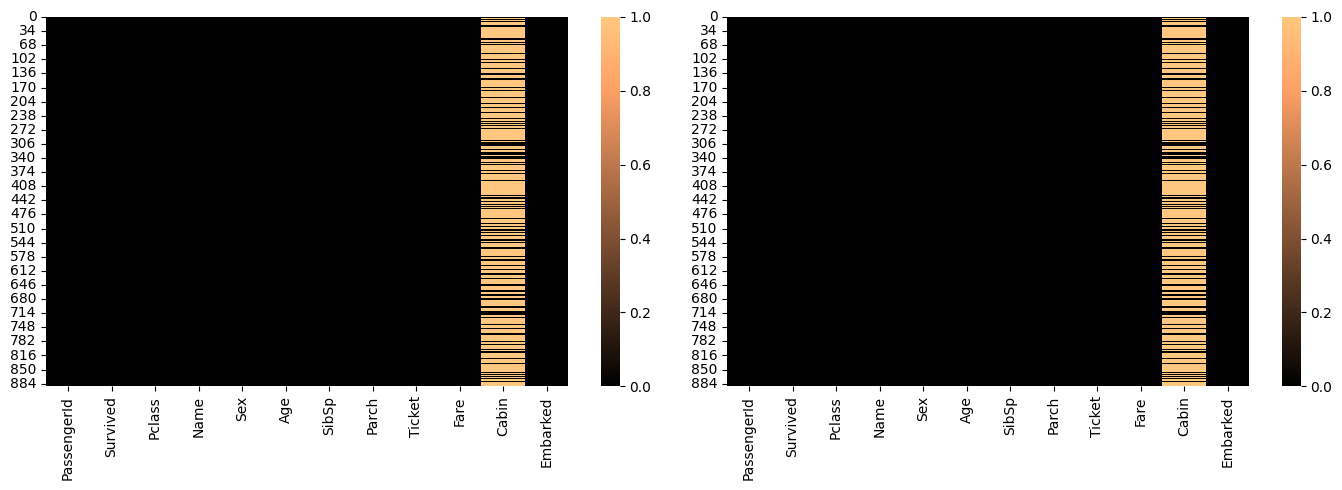

In [47]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df['Age'] = df[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(df.isnull(),cmap='copper', ax=ax1)
sns.heatmap(df.isnull(), cmap='copper', ax=ax2)
plt.tight_layout()

Almost all the data from Cabin is lost, i think we could make some assumptions to figure out a way to fill it, for example, let’s keep only the first letter and fill the missing ones with X.



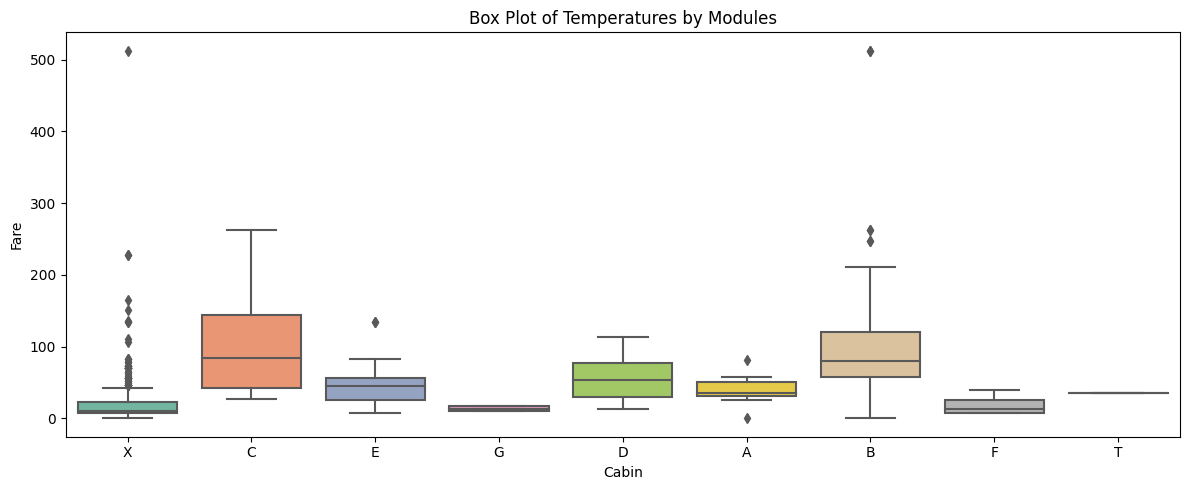

In [48]:
df['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in df['Cabin']])

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=df, palette='Set2')
plt.tight_layout()

We can see the mean of the missing X class is very low, this means that people without a cabin assign had, in almost every case, a lower fare, but there is some outliers that we can handle. We could take those outliers and assign them to class C or B since they have a higher Fare, lets do that. I’m going to make the assumption that people without a Cabin assigned payed a low fare, so everyone with a relative high fare in class X is an outlier, therefor i will reasigna them using the mean of the rest of the classes

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.1513406779661
Mean Fare of Cabin D 57.24457575757575
Mean Fare of Cabin E 46.02669375


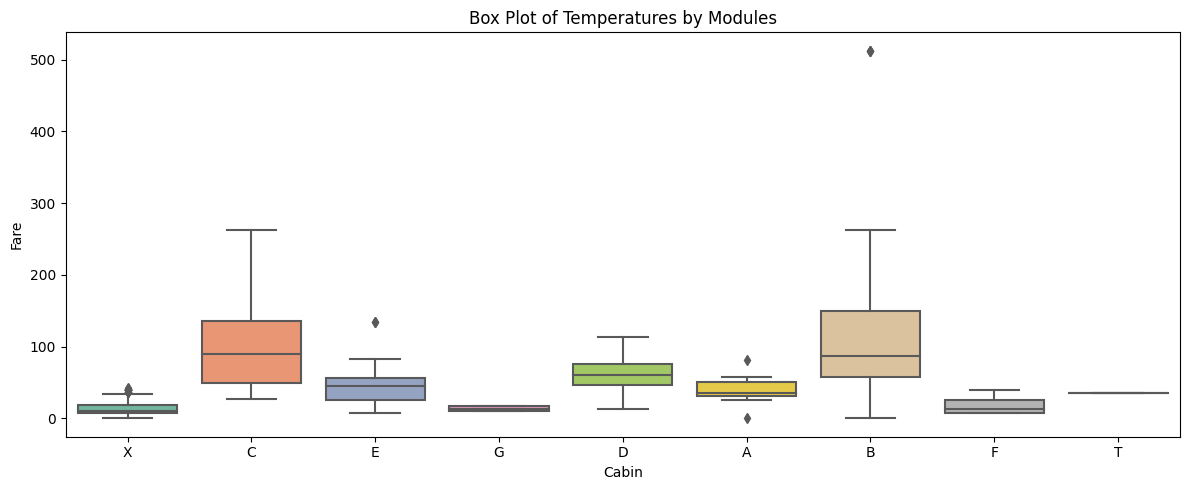

In [49]:
print('Mean Fare of Cabin B {}'.format(df[df['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(df[df['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(df[df['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(df[df['Cabin']=='E']['Fare'].mean()))

def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin
      
df['Cabin'] = df[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=df, palette='Set2')
plt.tight_layout()

In [50]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Feature engineering
Feature engineering involves analyze the features and extract useful information out of it, also creating new features out of existing ones

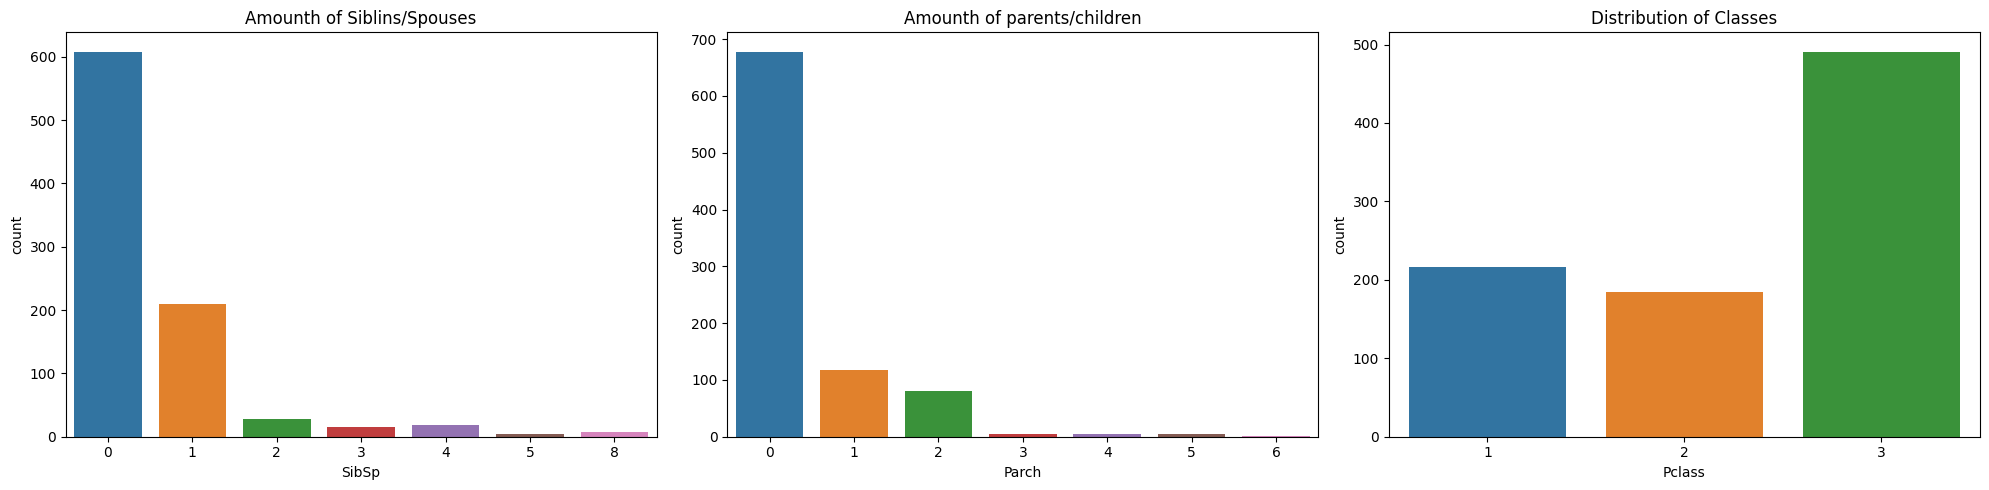

In [51]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=df, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=df, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=df, ax=axx[2])
plt.tight_layout()

According to the graphics, we can see that most of the people were alone and most belonged to 3rd class (lower). This corresponds to what we saw earlier with the Cabins and the fare, most people without a cabin assign had a small fare, makes sense they belong to class 3. We can create a new feature that specifies if the person was traveling alone or with family based on SibSp (Siblings/Spouses) and Parch (Parents/Children) attributes, also the size of the family. Those attributes could be of interest. Also, let’s plot the data in relation to the label.

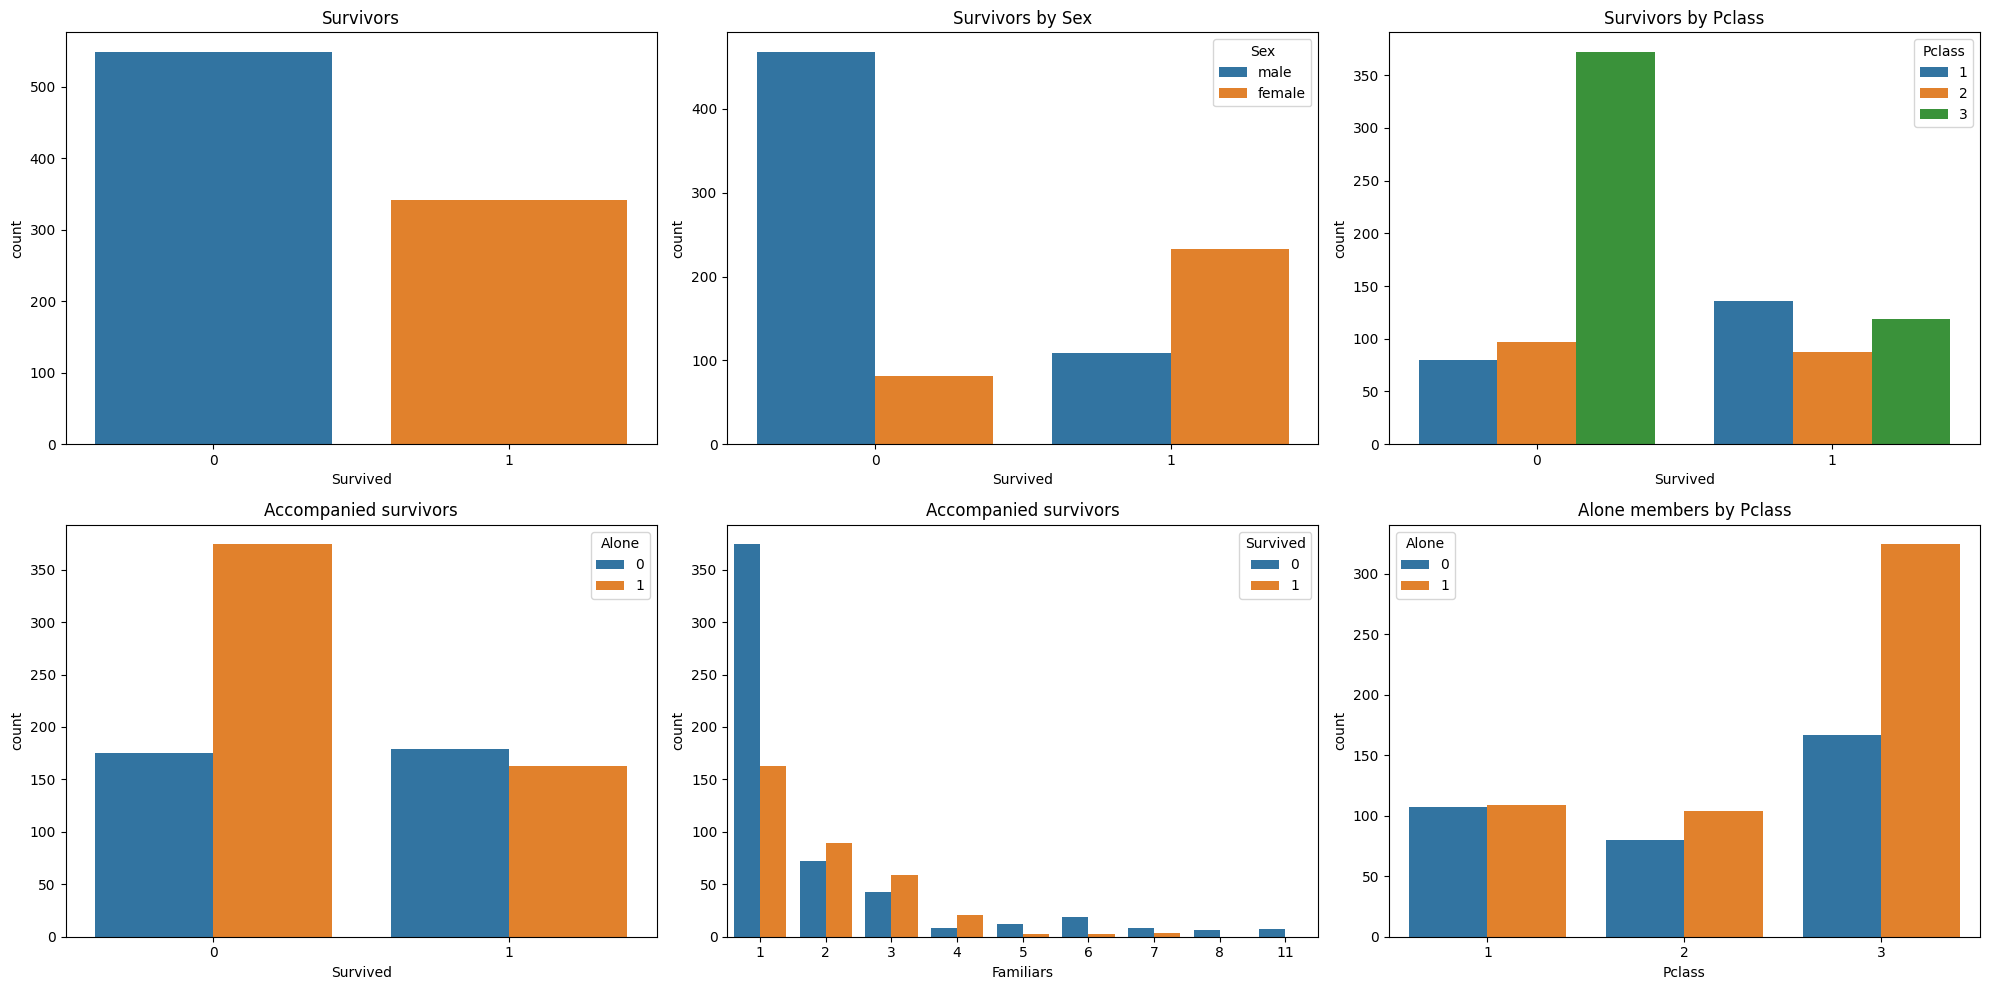

In [52]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0
 
df['Alone'] = df[['SibSp','Parch']].apply(create_alone_feature, axis=1)
df['Familiars'] = 1 + df['SibSp'] + df['Parch']

fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=df, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=df, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=df, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=df, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=df, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=df, ax=axx[1,2])
plt.tight_layout()

From the graphics we can see that most people died in the incident. Although most of the passengers were males, most of the survivals were woman, of course, ship workers and staff were probably males in majority, so it makes sense. We can see also that the majority of dead ones belonged to 3rd class (low class people), they were probably evacuated last and possibly were located in parts of the ship of more difficult access. Most of those who died were alone, this makes sense cause people from 3rd class were mostly alone and were the ones who died the most. Now let’s see the age and the fare of the survivors.

C:\Users\shrey\AppData\Local\Temp\ipykernel_4352\3710129232.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[df['Survived']==0]['Fare'], ax=axx[0], bins=30)
C:\Users\shrey\AppData\Local\Temp\ipykernel_4352\3710129232.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[df['Survived

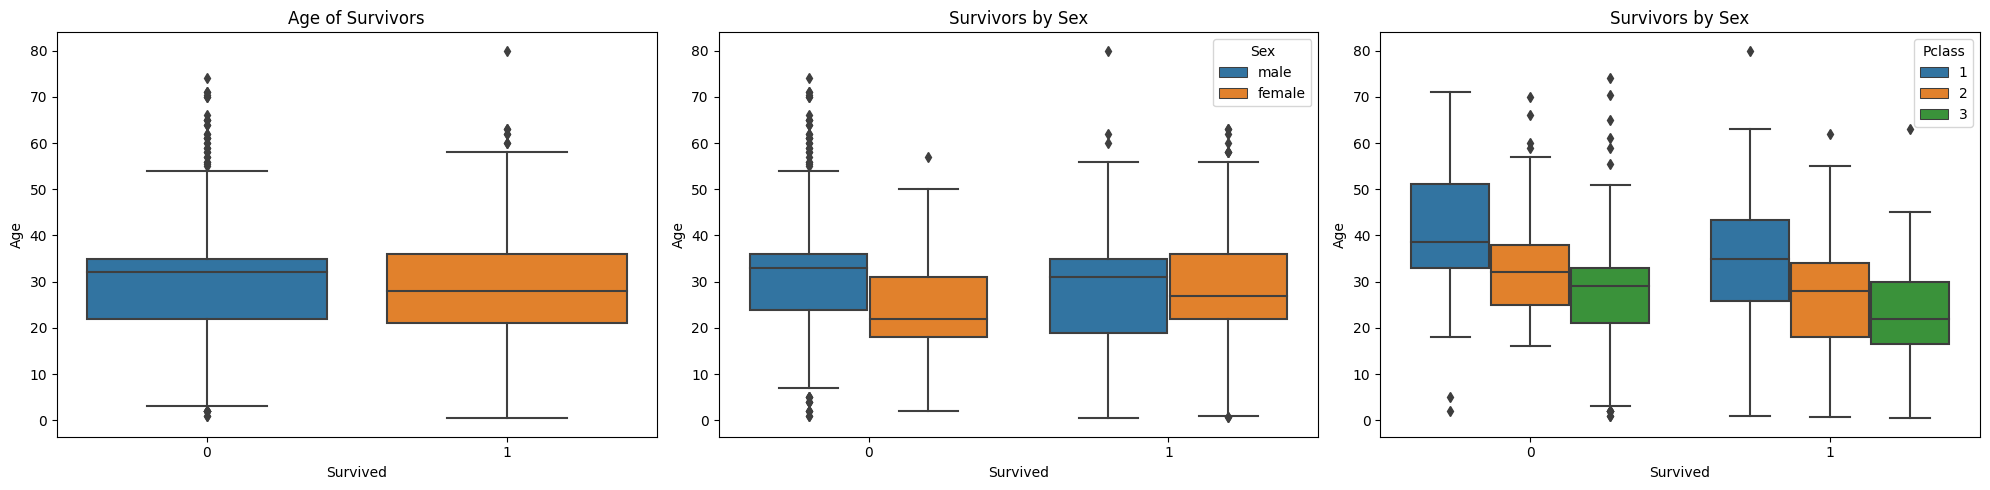

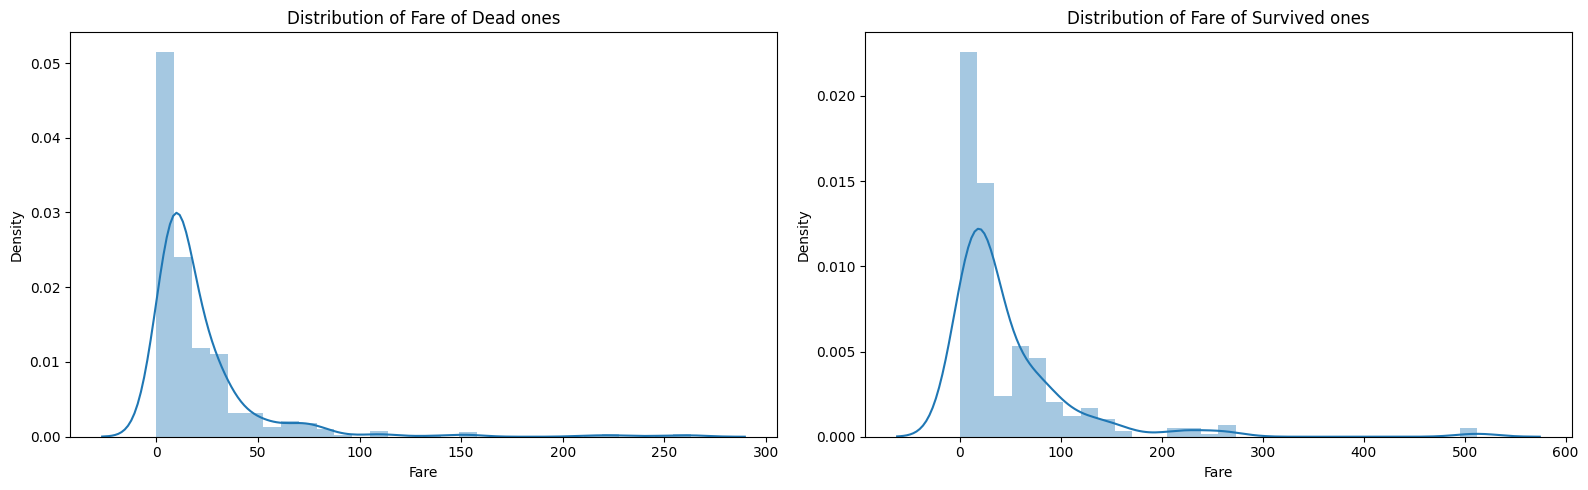

In [53]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='Survived', y='Age', data=df, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df, ax=axx[1])
axx[2].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=df, ax=axx[2])
plt.tight_layout()

fig, axx = plt.subplots(1, 2, figsize=(16,5))
axx[0].set_title('Distribution of Fare of Dead ones')
sns.distplot(a=df[df['Survived']==0]['Fare'], ax=axx[0], bins=30)
axx[1].set_title('Distribution of Fare of Survived ones')
sns.distplot(a=df[df['Survived']==1]['Fare'], ax=axx[1], bins=30)
plt.tight_layout()

Clearly the Fare of those who survived were higher, we can see that in the distribution of each one. Those who survived where a little bit younger than those who died. We can also see that people in 1st class were older than the rest and people from 3rd class were younger. Next we can see the correlation between the features. Fare and Survived has some correlation between, but correlation doesn’t take into account categoricals, so better to map features like Sex and Embarked to numbers.

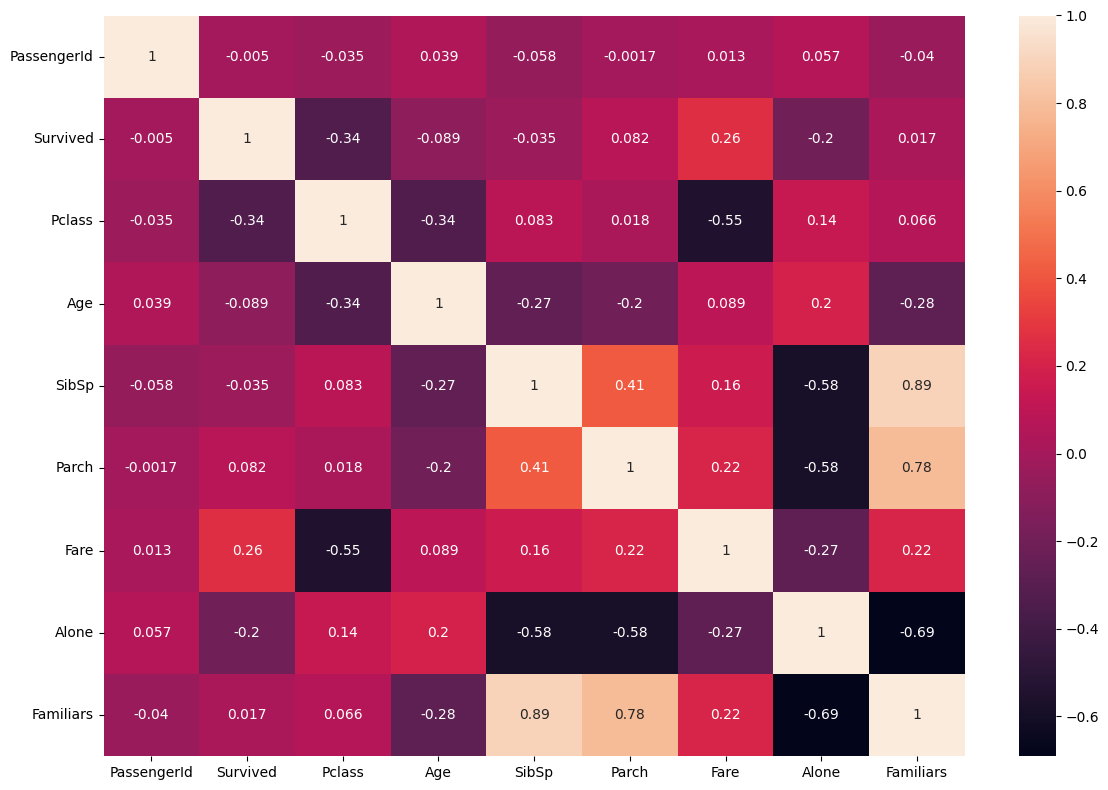

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

### Mapping categorical features
Machine Learning algorithms deals with numbers and not categorical, so we need to find a way to map these categories into numbers. This is easy to do in Pandas using map() method. I will define 1 for female and 0 for males, to have a positive correlation since most of the survivals were females.

['X' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


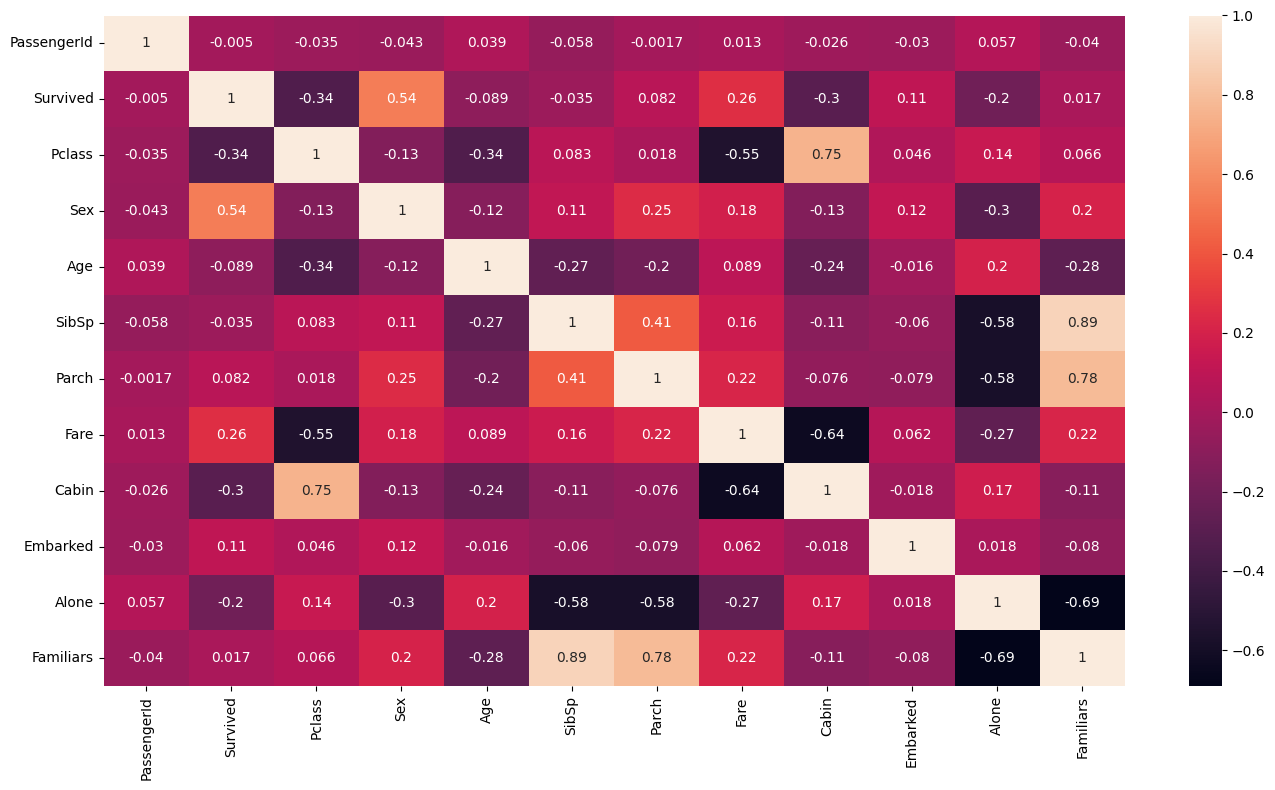

In [56]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
df['Embarked']= df['Embarked'].map(categories)

categories = df.Cabin.unique()
print(categories)
df['Cabin'] = df.Cabin.astype("category").cat.codes

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

### dropping columns

In [57]:

train_data = df.drop(['Name','Ticket','PassengerId'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,0,22.0,1,0,7.2500,8,1,0,2
1,1,1,1,38.0,1,0,71.2833,2,2,0,2
2,1,3,1,26.0,0,0,7.9250,8,1,1,1
3,1,1,1,35.0,1,0,53.1000,2,1,0,2
4,0,3,0,35.0,0,0,8.0500,8,1,1,1


### Normalize the data
Many machine learning algorithms like Regression types and distance based ones can converge faster when the data is normalized, this is a key step in every machine learning situation. 
To do so i will use MinMaxScaler library from Scikit Learn, but first we need to drop the label. When scaling, we only fit the scaler to the training dataset.

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Dropping label
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)

scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)

scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.00,0.0,0.0,0.1
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.25,0.5,0.0,0.1
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.00,0.0,1.0,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.25,0.0,0.0,0.1
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.00,0.0,1.0,0.0


I will use Random Forest Classifier. Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. Let’s split the data to use a testing set with labels

An interesting thing about the Random Forest Classifier from Sklearn is that provides a very easy way of reviewing the important features for the classification.



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [87]:
# applying linear regression model
# Removing less important features
from sklearn.linear_model import LinearRegression
new_train = scaled_train.drop(['Alone','Parch','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf =LinearRegression()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.r2_score(y_test, y_pred)))


   Accuracy: 0.4589304248383733


In [78]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


(712, 10) (179, 10)
(712,) (179,)


Accuracy: 0.7541899441340782


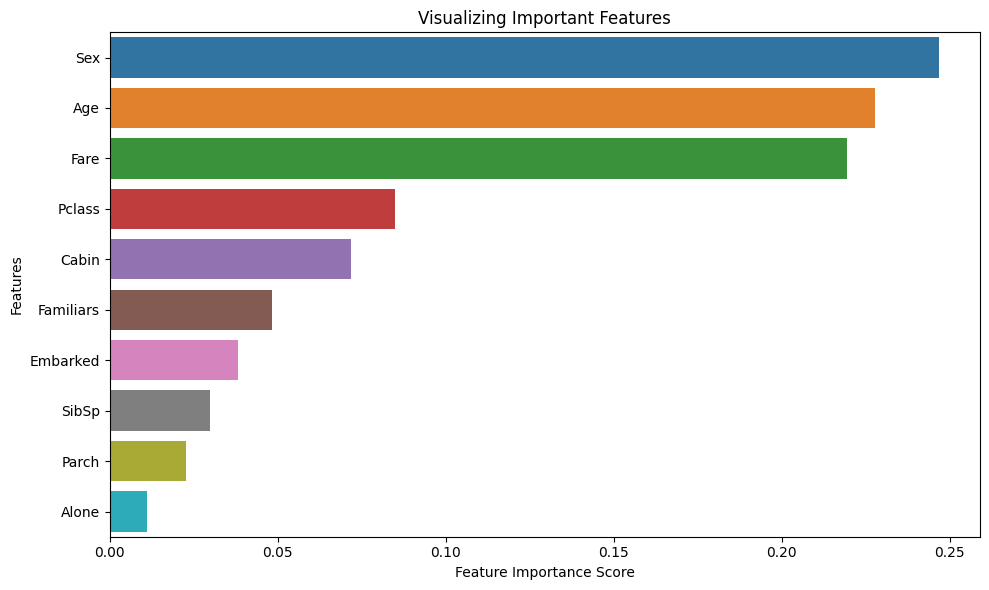

In [72]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

We can remove the less important features for the algorithm, and see if the accuracy improves. With all the features the accuracy was 75%. Let’s see removing the less important ones like ‘Alone’, ‘Parch’ and ‘Embarked’.

In [79]:
# Removing less important features
new_train = scaled_train.drop(['Alone','Parch','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))


   Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       110
           1       0.71      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



Removing the less important features the accuracy improves, also our model is better identifying dead people over survivors, after all, there were more examples of them. Finally we have the confusion matrix and the prediction in our original test dataset.

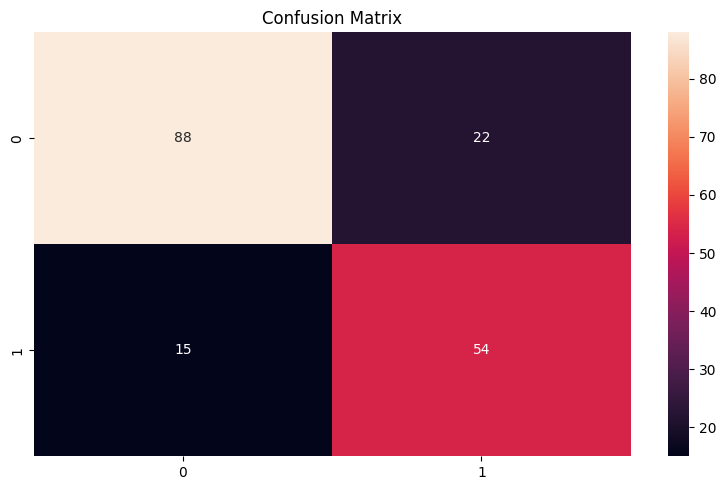

In [80]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()